In [1]:
from pathlib import Path, PosixPath
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import math
import shutil

In [2]:
dirpath = os.path.join('COVID-19')
if os.path.exists(dirpath) and os.path.isdir(dirpath):
    shutil.rmtree(dirpath)

In [3]:
!git clone https://github.com/pcm-dpc/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 303, done.
remote: Total 303 (delta 0), reused 0 (delta 0), pack-reused 303
Receiving objects: 100% (303/303), 12.52 MiB | 1.72 MiB/s, done.
Resolving deltas: 100% (182/182), done.


In [4]:
df = pd.read_csv('./COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv')
print("Numero di esempi: ", len(df))
df.head()

Numero di esempi:  294


,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2020-02-24 18:00:00,ITA,4,Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10


### Numero di righe per regione

In [5]:
group = df.groupby('denominazione_regione')['denominazione_regione'].count()
group.head(20)

denominazione_regione
Abruzzo                  14
Basilicata               14
Bolzano                  14
Calabria                 14
Campania                 14
Emilia Romagna           14
Friuli Venezia Giulia    14
Lazio                    14
Liguria                  14
Lombardia                14
Marche                   14
Molise                   14
Piemonte                 14
Puglia                   14
Sardegna                 14
Sicilia                  14
Toscana                  14
Trento                   14
Umbria                   14
Valle d'Aosta            14
Name: denominazione_regione, dtype: int64

### Seleziona regione

In [6]:
regione = 'Piemonte'
#regione = 'Lombardia'

In [7]:
df_regione = df.loc[df['denominazione_regione'] == regione]

### Correlazione tamponi-casi

In [8]:
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

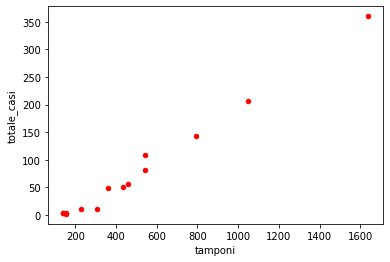

In [16]:
df_regione.plot(kind='scatter',x='tamponi',y='totale_casi',color='red')
plt.show()

### Correlazione generale

In [19]:
# df_regione.corr()

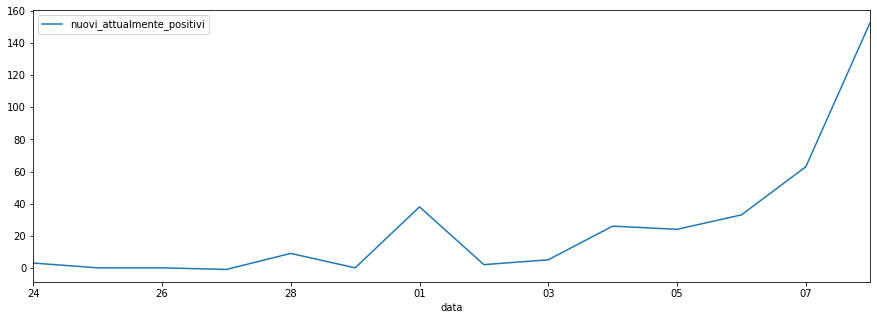

In [15]:
# gca stands for 'get current axis'
ax = plt.gca()

#df_regione.plot(kind='line',x='data',y='totale_casi',ax=ax, figsize=(15, 5), rot=0)
#df_regione.plot(kind='line',x='data',y='terapia_intensiva',ax=ax, figsize=(15, 5), rot=0)
df_regione.plot(kind='line',x='data',y='nuovi_attualmente_positivi',ax=ax, figsize=(15, 5), rot=0)

labels = [item.get_text() for item in ax.get_xticklabels()]
for i, label in enumerate(labels):
    try:
        labels[i] = label.split(' ')[0].split('-')[2]
    except IndexError:
        pass

ax.set_xticklabels(labels)
plt.show()

### Andamento generale